In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("Cricket.csv", encoding = 'latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [10]:
df.shape

(79, 13)

In [11]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [12]:
# datatype problem with Span and HS
df[['start','end']] = df['Span'].str.split('-', expand=True)
df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015


In [13]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
start      object
end        object
dtype: object

In [14]:
df[['start','end']] = df[['start','end']].astype(int)
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
start       int32
end         int32
dtype: object

In [15]:
df['experience'] = df['end'] - df['start']
df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15


In [16]:
df = df.drop(['Span','start','end'], axis=1)  # dropping unnecessary columns
df.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15


In [17]:
df['experience'].value_counts()

11    10
17     9
16     8
15     8
14     8
10     8
13     7
12     7
8      4
18     3
19     2
9      2
23     1
22     1
21     1
Name: experience, dtype: int64

In [18]:
df['HS'].value_counts()

131*    3
120*    3
145     3
119*    3
133*    2
       ..
142*    1
181*    1
109*    1
127*    1
124*    1
Name: HS, Length: 62, dtype: int64

In [19]:
df['HS'].to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [20]:
df[['HS','extra']] = df['HS'].str.split('*', expand=True)
df.head()

# this can also be performed using below code
# df.HS=df.HS.str.extract('(\d+)')

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None


In [22]:
df = df.drop(['extra'], axis=1)
df.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15


In [23]:
df.dtypes

Player         object
Mat             int64
Inns            int64
NO              int64
Runs            int64
HS             object
Ave           float64
BF              int64
SR            float64
100             int64
50              int64
0               int64
experience      int32
dtype: object

In [24]:
df['HS'] = df['HS'].astype(int)
df.dtypes

Player         object
Mat             int64
Inns            int64
NO              int64
Runs            int64
HS              int32
Ave           float64
BF              int64
SR            float64
100             int64
50              int64
0               int64
experience      int32
dtype: object

In [25]:
df.isnull().sum()

Player        0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
experience    0
dtype: int64

In [27]:
df[df.duplicated()].sum()

Player        0.0
Mat           0.0
Inns          0.0
NO            0.0
Runs          0.0
HS            0.0
Ave           0.0
BF            0.0
SR            0.0
100           0.0
50            0.0
0             0.0
experience    0.0
dtype: float64

In [28]:
df.duplicated().sum()

0

**Visualisation**

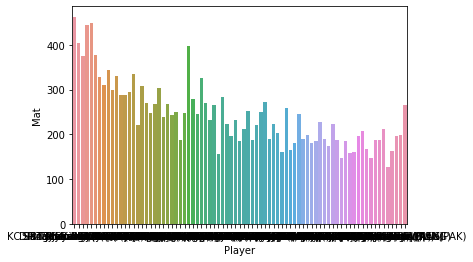

In [32]:
sns.barplot(x='Player', y='Mat', data=df)

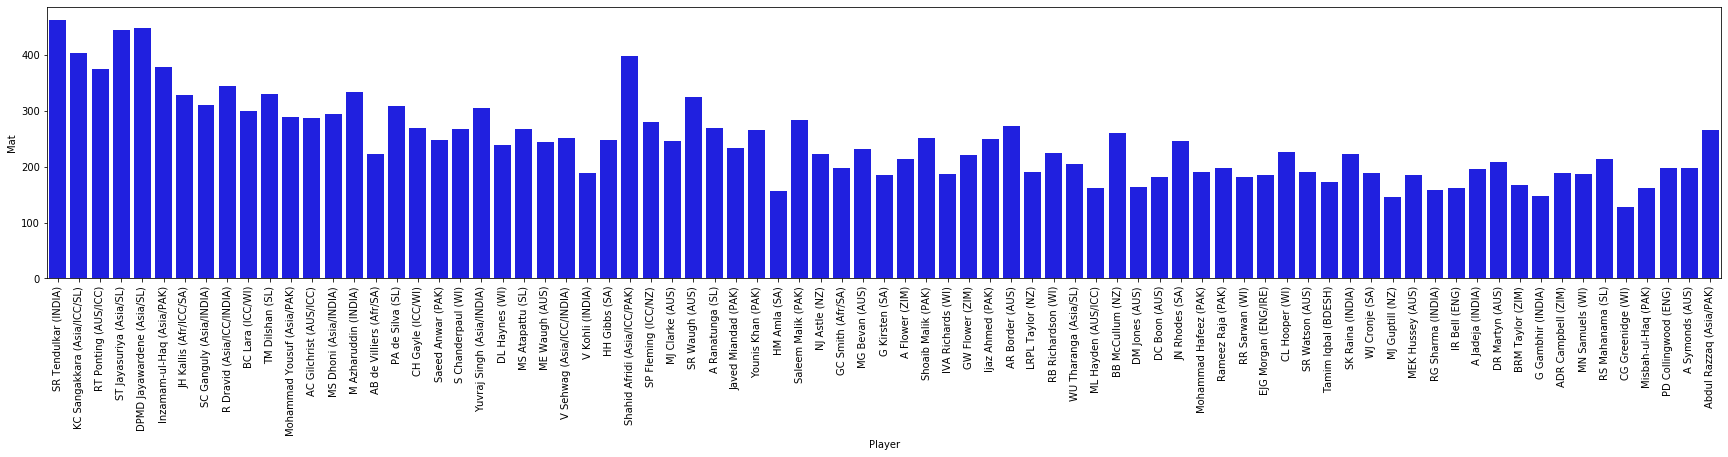

In [35]:
# making it presentable
plt.figure(figsize=(30,5))
sns.barplot(x='Player', y='Mat', data=df, color='b')
plt.xticks(rotation=90)
plt.show()

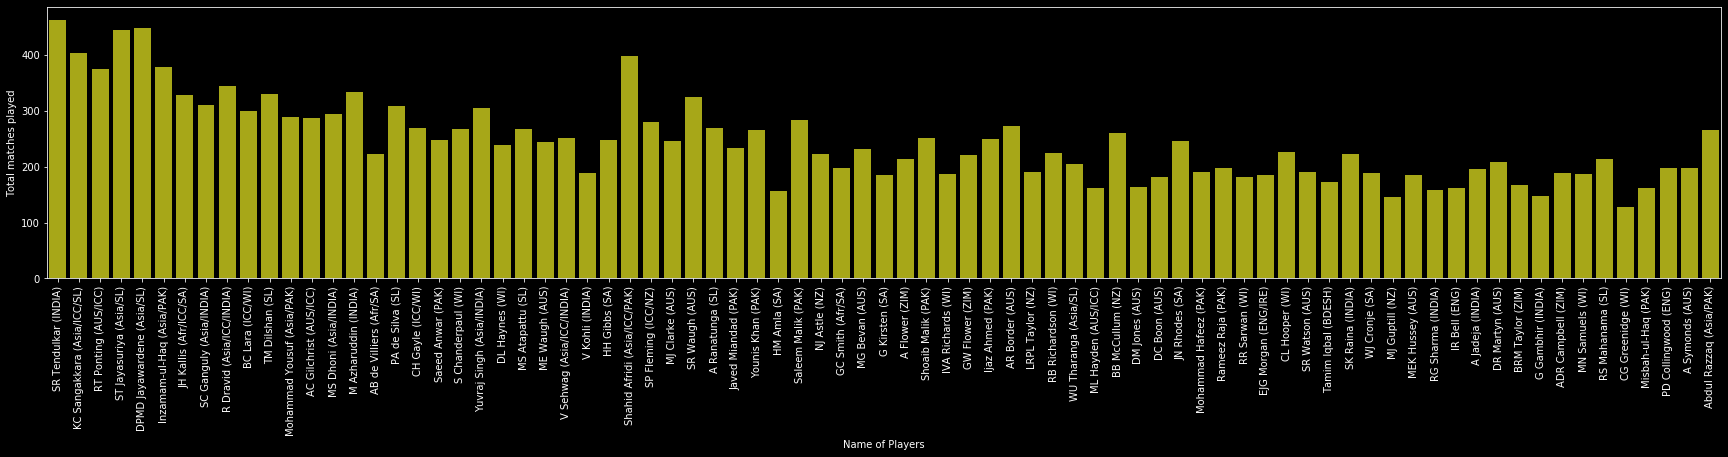

In [37]:
plt.style.use('dark_background')
plt.figure(figsize=(30,5))
p = sns.barplot(x='Player', y='Mat', data=df, color='y')
p.set(xlabel='Name of Players', ylabel='Total matches played')
plt.xticks(rotation=90)
plt.show()

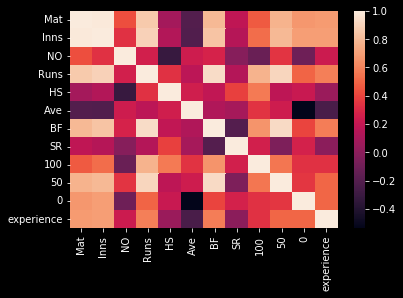

In [38]:
sns.heatmap(df.corr())

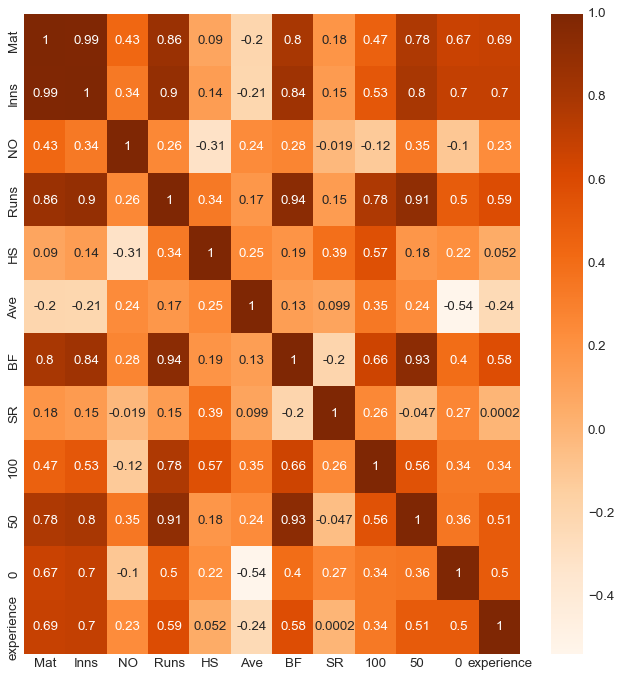

In [45]:
# if getting error due to categorical columns  --> df.corr(numeric_only=True)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.show()

**Standardisation**

In [46]:
df.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15


In [47]:
a = df.drop(['Player'], axis=1)       # to drop columns axis=1, axis=0 (drops rows)
a.head(2)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

In [50]:
scaled_df = sc.fit_transform(a)
scaled_df

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [51]:
a.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'experience'],
      dtype='object')

In [52]:
scaled_df = pd.DataFrame(scaled_df, columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'experience'])
scaled_df.head(3)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900


**Model Building**

In [53]:
kmeans = KMeans()     # by default it will pick clusters
kmeans.fit(scaled_df)

KMeans()

In [55]:
kmeans.labels_

array([6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 5, 3, 4, 4, 3, 3, 3,
       3, 4, 4, 5, 4, 7, 7, 3, 7, 7, 3, 7, 5, 7, 2, 2, 0, 2, 2, 7, 5, 7,
       7, 7, 0, 2, 2, 5, 7, 0, 2, 7, 2, 2, 0, 2, 7, 5, 2, 2, 0, 5, 0, 5,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 7])

**Elbow Method**

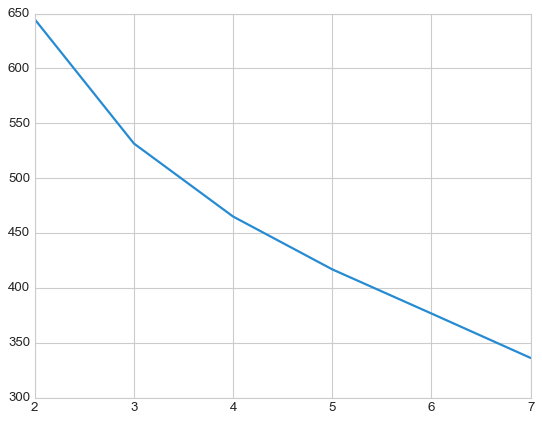

In [56]:
clusters = list(range(2,8))
sse = []

for num_cluster in clusters:
    model = KMeans(n_clusters=num_cluster, max_iter=150, random_state=50)
    model.fit(scaled_df)
    sse.append(model.inertia_)
    
plt.plot(clusters, sse)                     # elbow at k=3

**Silhouette Method**

In [57]:
from sklearn.metrics import silhouette_score

In [59]:
clusters = list(range(2,8))

for num_cluster in clusters:
    model = KMeans(n_clusters=num_cluster, max_iter=150, random_state=50)
    model.fit(scaled_df)
    
    cluster_label = model.labels_
    sil_score = silhouette_score(scaled_df, cluster_label)
    print("For n_clusters ", num_cluster, "Sihouette score is ", sil_score)             # optimal k = 2 or 3

For n_clusters  2 Sihouette score is  0.3136820966012298
For n_clusters  3 Sihouette score is  0.2145859150936642
For n_clusters  4 Sihouette score is  0.20533122063552012
For n_clusters  5 Sihouette score is  0.20736135372000328
For n_clusters  6 Sihouette score is  0.18852859678609948
For n_clusters  7 Sihouette score is  0.1817544285967207


In [61]:
# Model Building with optimal k=3
cluster_model = KMeans(n_clusters=3, max_iter=150, random_state=50)
cluster_model.fit(scaled_df)

KMeans(max_iter=150, n_clusters=3, random_state=50)

In [62]:
pred = cluster_model.predict(scaled_df)
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [63]:
df['clusters'] = cluster_model.labels_
df.head(3)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0


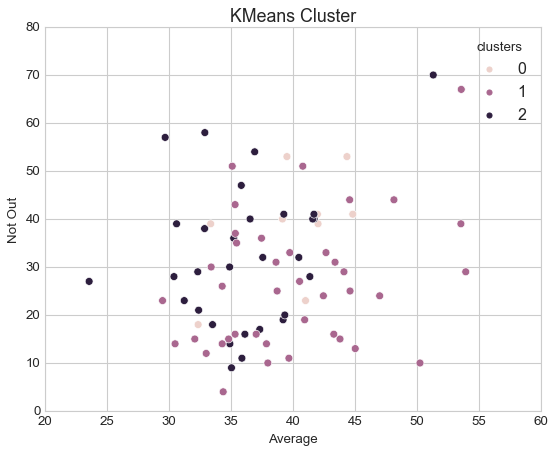

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Ave', y='NO', data=df, hue='clusters', s=50)
plt.title("KMeans Cluster")
plt.xlabel("Average")
plt.ylabel("Not Out")
plt.show()

In [ ]:
# **to be continued** ..........